In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jamshid-ds/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


Visualizing Dataset to get understandable informations

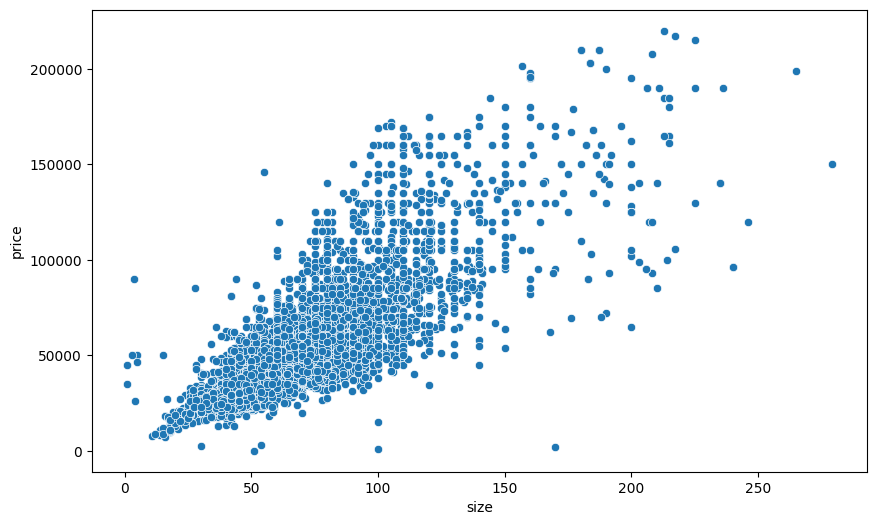

In [3]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='size', y='price')
plt.show()

Let's see correlation between price and size


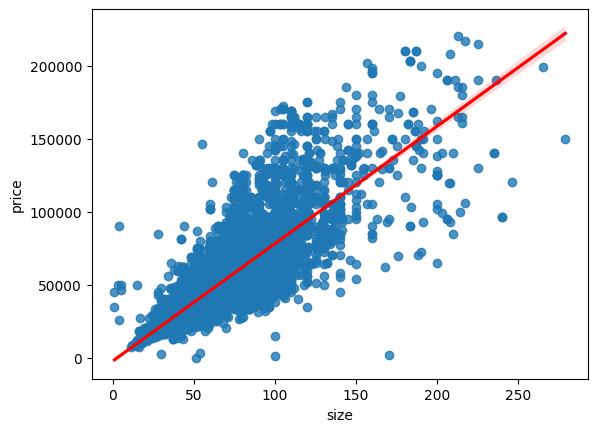

In [6]:
sns.regplot(data=df, x='size', y='price', line_kws={'color':'red'})
plt.show()

**Let's divide the dataset to two pieces to use them in ML part**

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.1, random_state=10)

In [10]:
X_train=np.asanyarray(train_set[['size']])
Y_train=np.asanyarray(train_set[['price']])

In [11]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [14]:
model.fit(X_train, Y_train)

LinearRegression()

In [15]:
X_test = np.asanyarray(test_set[['size']])
Y_test = np.asanyarray(test_set[['price']])

In [16]:
Y_predict = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y_test, Y_predict)
mse = np.sqrt(mean_squared_error(Y_test, Y_predict))

print(mae)
print(mse)

12252.96591962078
17265.169548980077


In [18]:
import joblib
joblib.dump(model, 'LR_model.joblib')

['LR_model.joblib']